In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import pickle
a_file = a_file = open("test_1_mun.pkl", "rb")
results = pickle.load(a_file)
a_file.close()



mun_systems0 = pd.DataFrame(test[results_clean[0])
mun_systems1 = pd.DataFrame(test[results_clean[0]['CO2 cluster'] == 1].mean(axis = 0))
mun_systems2 = pd.DataFrame(test[results_clean[0]['CO2 cluster'] == 2].mean(axis = 0))
mun_systems3 = pd.DataFrame(test[results_clean[0]['CO2 cluster'] == 3].mean(axis = 0))
mun_systems_std= pd.DataFrame(test.var(axis = 0))

In [3]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2019_gegeneraliseerd&outputFormat=json'
municipalities  = gpd.read_file(geodata_url)

In [4]:
municipalities.statnaam = municipalities.statnaam.str.replace('â', 'a').str.replace('ú','u')

In [5]:
muns = np.array(municipalities.statnaam)
muns.sort()

In [6]:
arrays = [muns,np.array(["Natural Gas", "Green Gas", "LT Heating Grid", "MT Heating Grid", "HT Heating Grid", "Air Heat Pump", "Ground Heat Pump", "Hybrid Heat Pump"])]

In [7]:
index = pd.MultiIndex.from_product(arrays, names=['Municipality', 'Energy System'])

In [8]:
mun_systems = pd.DataFrame(results[1]['System Distributions'][0] , columns = index)

In [9]:
mun_systems.columns = index

In [10]:
mun_systems.xs('HT Heating Grid',axis = 1, level=1, drop_level=True)

Municipality,'s-Gravenhage,'s-Hertogenbosch,Aa en Hunze,Aalsmeer,Aalten,Achtkarspelen,Alblasserdam,Albrandswaard,Alkmaar,Almelo,...,Zeist,Zevenaar,Zoetermeer,Zoeterwoude,Zuidplas,Zundert,Zutphen,Zwartewaterland,Zwijndrecht,Zwolle
0,0.080302,0.0,0.0,0.0,0.0,0.0,0.026372,0.010008,0.014418,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.005703
1,0.075017,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.014418,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.005703
2,0.071416,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.005703
3,0.070633,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
4,0.070633,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
5,0.070633,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
6,0.063251,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
7,0.060766,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.008053,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
8,0.059502,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.003387,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000
9,0.056938,0.0,0.0,0.0,0.0,0.0,0.000000,0.010008,0.003387,0.024046,...,0.0,0.0,0.058156,0.0,0.005806,0.0,0.0,0.0,0.0,0.000000


In [11]:
municipalities_GG = municipalities.merge(mun_systems.xs('Green Gas',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_MT = municipalities.merge(mun_systems.xs('MT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HPA = municipalities.merge(mun_systems.xs('Air Heat Pump',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HPG = municipalities.merge(mun_systems.xs('Ground Heat Pump',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_LT = municipalities.merge(mun_systems.xs('LT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HT = municipalities.merge(mun_systems.xs('HT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_NG = municipalities.merge(mun_systems.xs('Natural Gas',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)

In [12]:
municipalities_HG = municipalities_GG.iloc[:,:6].merge(municipalities_MT.iloc[:,6:47] + municipalities_HT.iloc[:,6:47] + municipalities_LT.iloc[:,6:47],left_index = True, right_index = True)

In [13]:
municipalities_HP = municipalities_GG.iloc[:,:6].merge(municipalities_HPA.iloc[:,6:47] + municipalities_HPG.iloc[:,6:47],left_index = True, right_index = True)

In [129]:
municipalities_G = municipalities_GG.iloc[:,:6].merge(municipalities_GG.iloc[:,6:47] + municipalities_NG.iloc[:,6:47],left_index = True, right_index = True)

In [78]:
from mapclassify import Quantiles, UserDefined, NaturalBreaks, EqualInterval

In [68]:
bins

array([0.11797643, 0.14744782, 0.16880959, 0.19496257, 0.47285396])

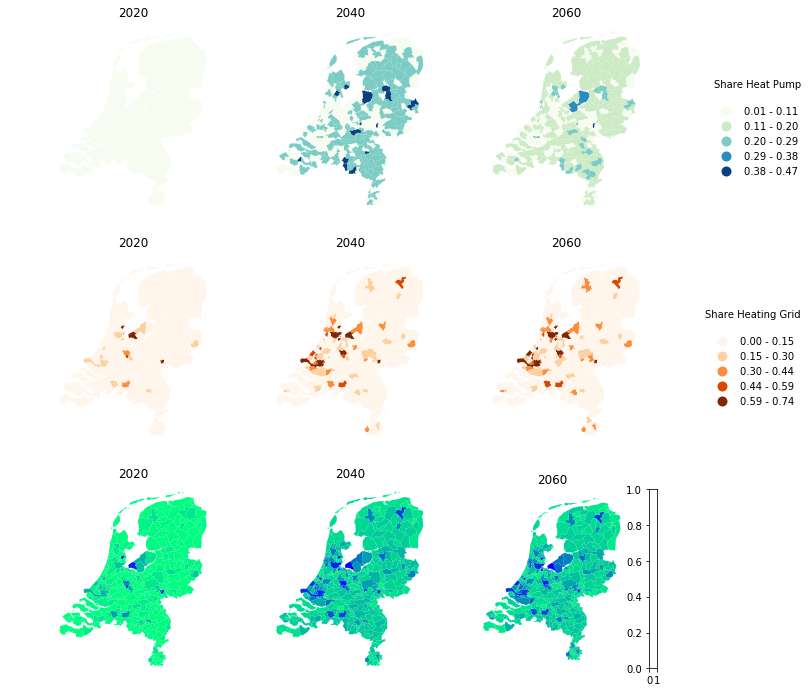

In [168]:
city = 'Municipalities'
year = 2060
data = 40

#show_map = mun_systems.loc[year,:]
#show_map = show_map.where(map_data.Year == year).dropna(how = 'all')

from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig, ax = plt.subplots(1, 1)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(11,12))


#bins = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
bins = EqualInterval(municipalities_HP[40], 5).bins

municipalities_HP.plot(0, scheme='UserDefined',  ax=ax1, cmap='GnBu',  cax=ax3, classification_kwds=dict(bins=bins),
                      legend_kwds=dict(loc='upper right', bbox_to_anchor=(1.5, 0.75), title="Share Heat Pump\n", frameon=False))

municipalities_HP.plot(10, scheme='UserDefined',  ax=ax2, cmap='GnBu',  cax=ax3, classification_kwds=dict(bins=bins),
                      legend_kwds=dict(loc='upper right', bbox_to_anchor=(1.5, 0.75), title="Share Heat Pump\n", frameon=False))

municipalities_HP.plot(20, scheme='UserDefined',  ax=ax3, cmap='GnBu', legend=True, cax=ax3, classification_kwds=dict(bins=bins),
                      legend_kwds=dict(loc='upper right', bbox_to_anchor=(2, 0.75), title="Share Heat Pump\n", frameon=False))
 
ax1.set_title(2020)
ax2.set_title(2040)
ax3.set_title(2060)

bins = EqualInterval(municipalities_HG[40], 5).bins

municipalities_HG.plot(0, scheme='UserDefined',  ax=ax4, cmap='Oranges', classification_kwds=dict(bins=bins))
municipalities_HG.plot(10, scheme='UserDefined',  ax=ax5, cmap='Oranges', classification_kwds=dict(bins=bins))
municipalities_HG.plot(20, scheme='UserDefined',  ax=ax6, cmap='Oranges', legend=True, classification_kwds=dict(bins=bins),
                      legend_kwds=dict(loc='upper right', bbox_to_anchor=(2, 0.75), title="Share Heating Grid\n", frameon=False))
ax4.set_title(2020)
ax5.set_title(2040)
ax6.set_title(2060)

bins = EqualInterval(municipalities_G[40], 5).bins

municipalities_G.plot(0,  ax=ax7, cmap='winter')
municipalities_G.plot(10, ax=ax8, cmap='winter')
municipalities_G.plot(20, ax=ax9, cmap='winter', cax = ax9)#,
                      #legend_kwds=dict(loc='upper right', bbox_to_anchor=(2, 0.75), title="Share (Green) Gas\n", frameon=False))
ax7.set_title(2020)
ax8.set_title(2040)
ax9.set_title(2060)

divider = make_axes_locatable(ax9)
cax = divider.append_axes("right", size="5%", pad=0.3)

for ax in (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9):
    ax.axis('off')

    
    #GG = municipalities_GG.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='winter', legend = True)#

# for ax in (ax1,ax2,ax3,):
#     ax.axis('off')





#HG = municipalities_HG.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='Purples', legend = True)#
#HT = municipalities_HT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='Reds', legend = True)#
#MT = municipalities_MT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='Oranges', legend = True)#
#LT = municipalities_LT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='Blues', legend = True)#
#HP = municipalities_HP.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='GnBu', legend = True)#


#for i in [GG, HG, HT, MT, LT, HP]:
#    i.axis('off')
#s.axis('off')
#p.set_title(f'{data}, {city}, {year}')





In [ ]:
from matplotlib import cm, colors, colorbar
from ast import literal_eval

def createColourbar(lwr, upr, axes, cmap):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = colorbar.make_axes(axes)
    norm = colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
    return c

def show_choropleth_maps(map_data, cities, years, present_variable, orientation = None, cmap = 'viridis', legend = False, fig_h = 12, fig_w = 12, vmax = None, missing_kwds = None):
    """Create choropleth for dataset with Municipality and Year"""
    
    if missing_kwds != None:
        missing_kwds = missing_kwds = dict(color = "lightgrey") 
    
    cat_dict = {}
    for i in map_data.columns[map_data.dtypes != float][10:]:
        cat_dict[i] = dict(zip(map_data[i].dropna().unique(),
                   [x for x in range(map_data[i].dropna().nunique())]))
        
    if map_data[present_variable].dtype != float:
        categorical = True
        map_data[present_variable] = map_data[present_variable].map(cat_dict[present_variable]).astype(object)
    
    if vmax == None:
        vmax = round(map_data.set_index(['Municipality','Year']).loc[(cities,years),[present_variable]].max(),1) 
    vmin = 0
    
    figsize = (fig_h, fig_w)
    
    fig, axes = plt.subplots(len(cities),len(years), figsize = figsize)

    for i in range (len(cities)):
        for j in range (len(years)):
            city = map_data.Municipality == cities[i]
            year = map_data.Year == years[j]      
            dataset= map_data.loc[city].loc[year]
            if len(cities) > 1 and len(years) > 1:
                mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes[i][j], vmin=vmin, vmax=vmax, legend=legend, missing_kwds=missing_kwds)
            else:
                if len(cities) > 1 or len (years) > 1: 
                    mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes[max(i,j)], vmin=vmin, vmax=vmax,legend=legend, missing_kwds=missing_kwds)
                else:
                    mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes, vmin=vmin, vmax=vmax,legend=legend, missing_kwds=missing_kwds)
            mp.axis('off')
            mp.set_title(f'{cities[i]}, {years[j]}')

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.05)        

    if map_data[present_variable].dtype == float:
        createColourbar(0,vmax, axes, cmap)
    else:
        colors = viridis(np.linspace(0, 1, len(cat_dict[present_variable])))
        f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
        handles = [f("s", colors[i]) for i in range(len(colors))]
        labels = cat_dict[present_variable]
        legend = fig.legend(handles, labels, loc = 8, framealpha=1, frameon=True , prop={'size': 16})#, bbox_to_anchor=[0.9, 0.8])

    for i in range (len(cities)):
        for j in range (len(years)):
            if len(cities) > 1 and len(years) > 1:
                axes[i][j].set_anchor('C')
            else:
                if len(cities) > 1 or len (years) > 1:
                    axes[max(i,j)].set_anchor('C')
                else:
                    axes.set_anchor('C')